In [1]:
import pandas as pd
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style("whitegrid")

In [2]:
raw = pd.read_csv("data.csv")
raw.shape

(30697, 25)

In [3]:
data = raw.copy()
del raw
# Data Cleaning
data = data[pd.notnull(data['shot_made_flag'])]
data['time_remaining'] = data['minutes_remaining'] * 60 + data['seconds_remaining']
data.drop('seconds_remaining', axis=1, inplace=True)# replacing it with time_remaining
data.drop('minutes_remaining', axis=1, inplace=True)# replacing it with time_remaining
data.drop('team_id', axis=1, inplace=True) # Always one number
data.drop('lat', axis=1, inplace=True) # Correlated with loc_x
data.drop('lon', axis=1, inplace=True) # Correlated with loc_y
data.drop('game_id', axis=1, inplace=True) # Independent
data.drop('game_event_id', axis=1, inplace=True) # Independent
data.drop('team_name', axis=1, inplace=True) # Always LA Lakers
data.drop('matchup', axis=1, inplace=True) # same information as opponent
data.shape

(25697, 17)

In [4]:
shot_missed = data[data.shot_made_flag==0].season.value_counts().sort_index()
shot_made = data[data.shot_made_flag==1].season.value_counts().sort_index()
shot = pd.concat([shot_made,shot_missed],axis=1)
shot.columns=['Success','Missed']

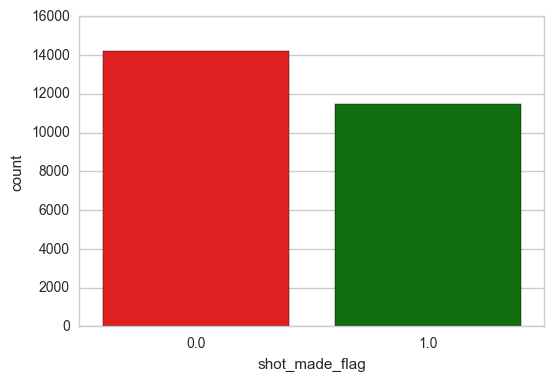

In [5]:
sns.countplot(x="shot_made_flag",data=data,palette=sns.color_palette(['red','green']))

In [6]:
data['shot_made_flag'].value_counts() /data['shot_made_flag'].shape

0.0    0.553839
1.0    0.446161
Name: shot_made_flag, dtype: float64

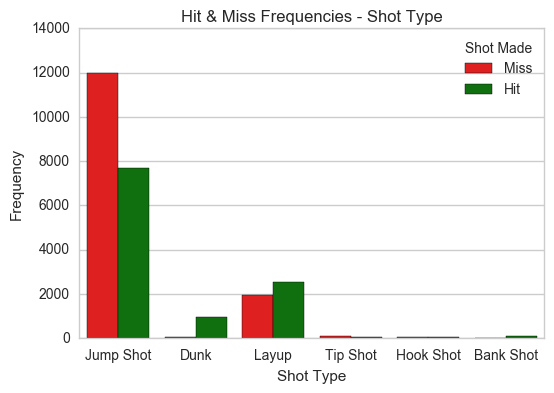

In [7]:
#sns.plt.figure(figsize = (12,12))
sns.countplot(x='combined_shot_type', hue='shot_made_flag', data=data,palette=sns.color_palette(['red','green']))
sns.plt.title('Hit & Miss Frequencies - Shot Type')
sns.plt.xlabel('Shot Type')
sns.plt.ylabel('Frequency')
sns.plt.legend(labels = ['Miss','Hit'],title='Shot Made')

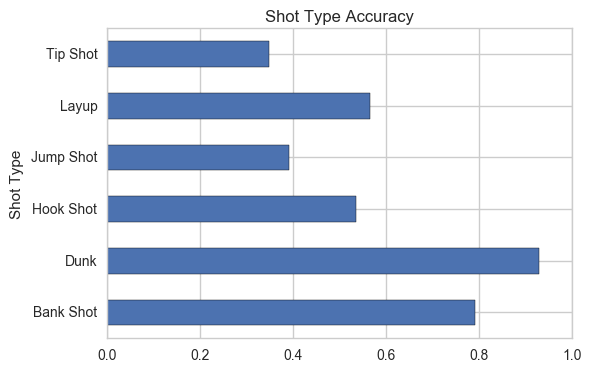

In [8]:
data['shot_made_flag'].groupby(data['combined_shot_type']).mean().plot(kind='barh')
plt.title('Shot Type Accuracy')
plt.ylabel('Shot Type')

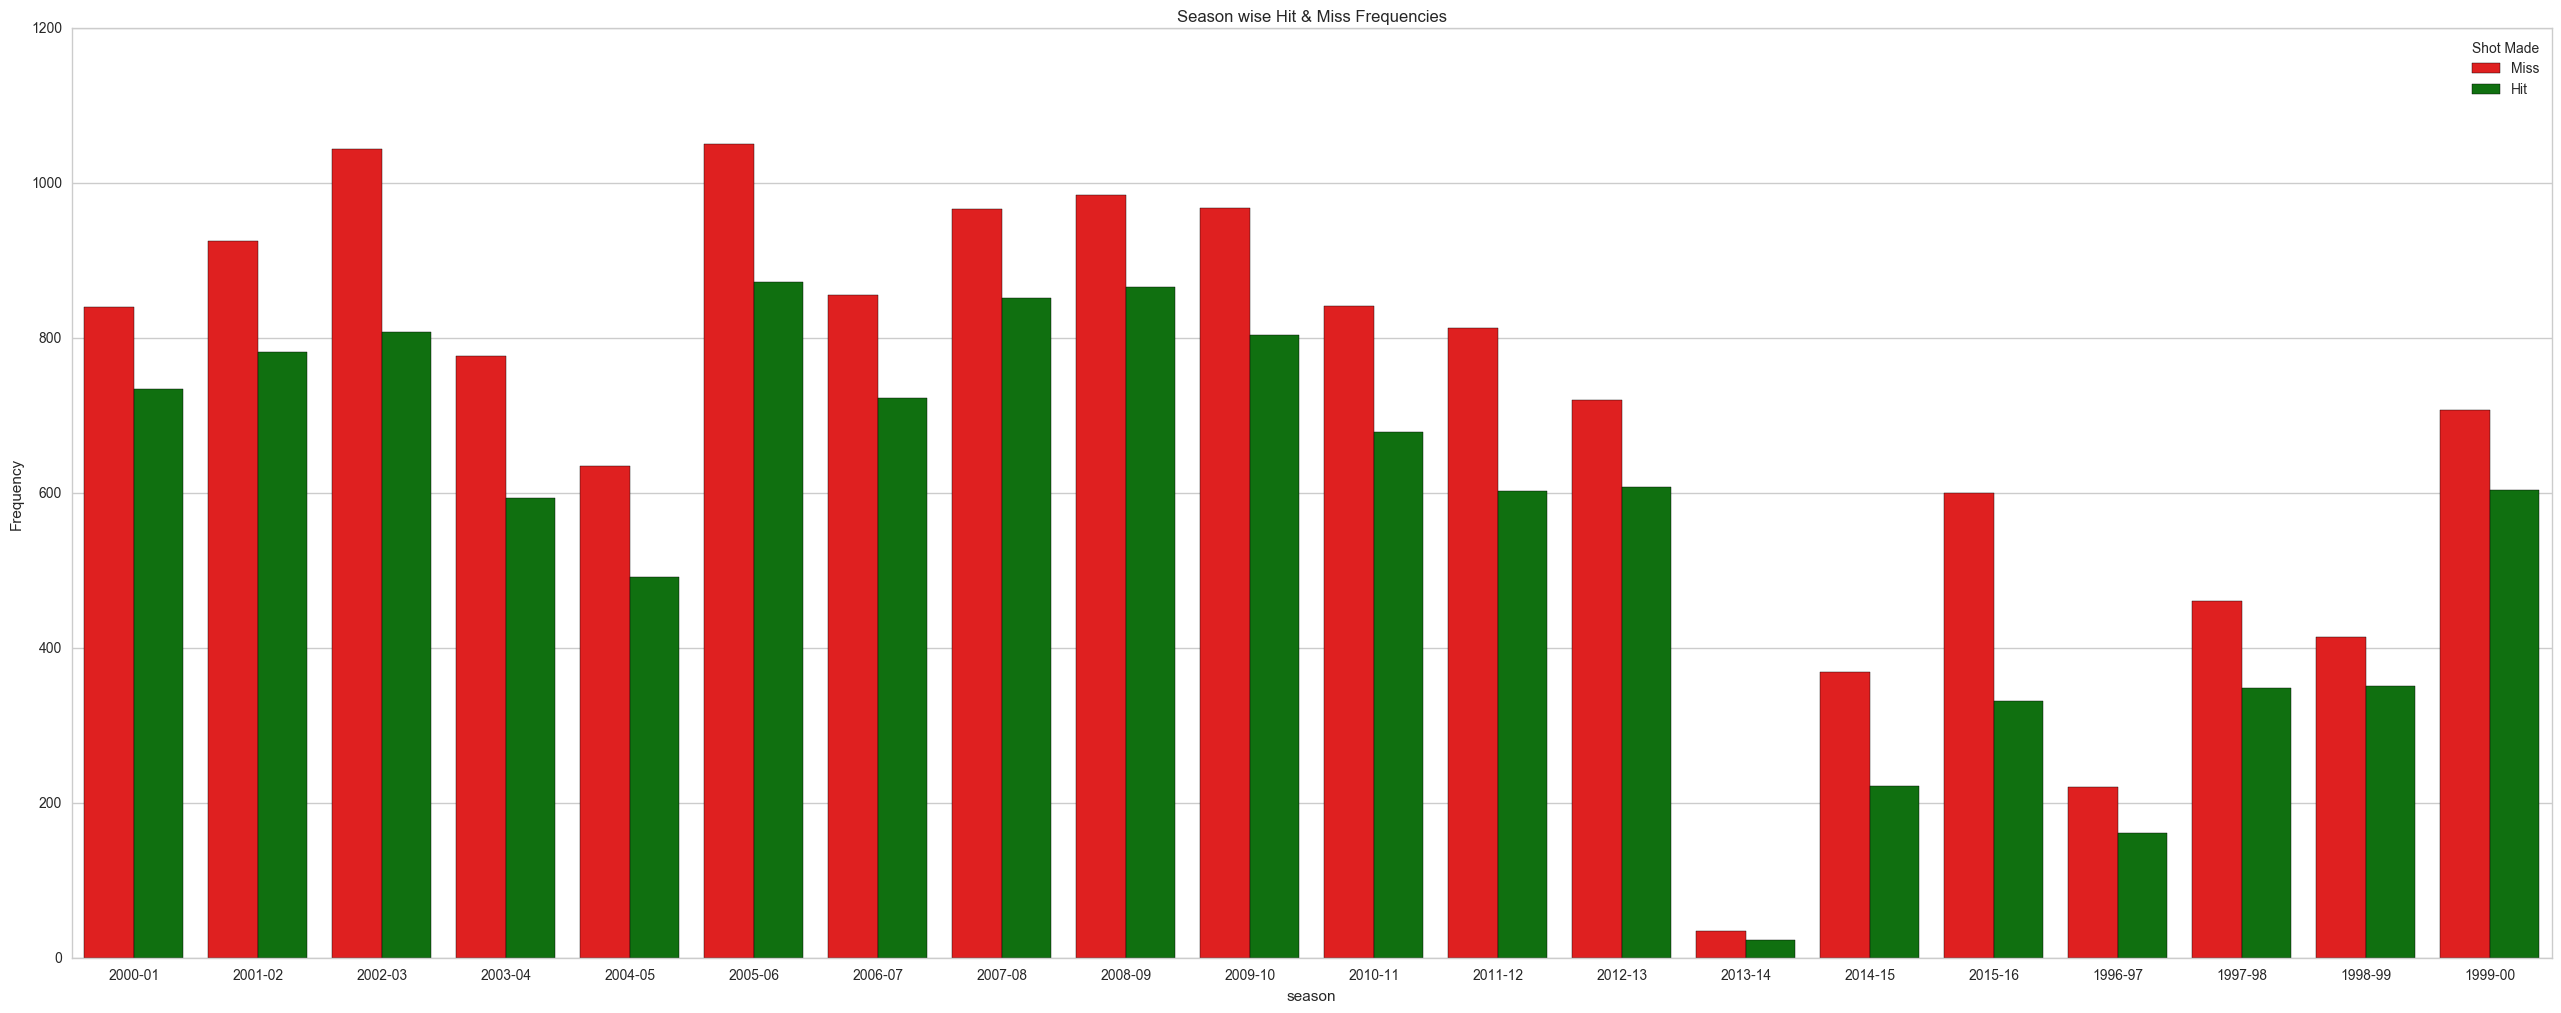

In [9]:
plt.figure(figsize=(32, 12))
sns.countplot(x="season", hue="shot_made_flag", data=data,palette=sns.color_palette(['red','green']))
sns.plt.title('Season wise Hit & Miss Frequencies')
sns.plt.ylabel('Frequency')
sns.plt.legend(labels = ['Miss','Hit'],title='Shot Made')

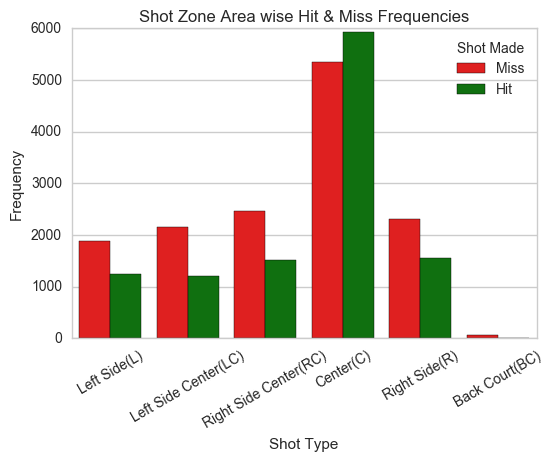

In [10]:
sns.plt.xticks(rotation=30)
#sns.plt.figure(figsize = (12,12))
sns.countplot(x="shot_zone_area", hue="shot_made_flag", data=data,palette=sns.color_palette(['red','green']))
sns.plt.title('Shot Zone Area wise Hit & Miss Frequencies')
sns.plt.xlabel('Shot Type')
sns.plt.ylabel('Frequency')
sns.plt.legend(labels = ['Miss','Hit'],title='Shot Made')

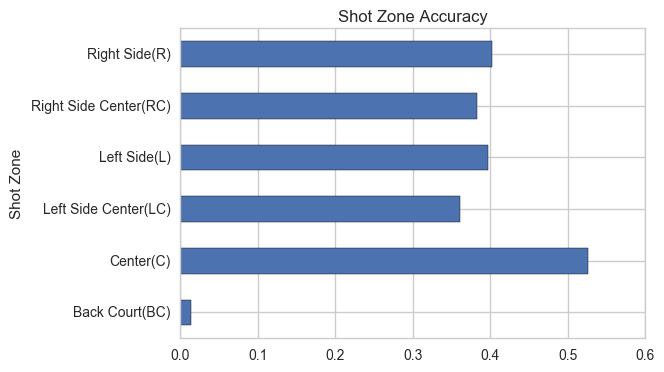

In [11]:
data['shot_made_flag'].groupby(data['shot_zone_area']).mean().plot(kind='barh')
plt.title('Shot Zone Accuracy')
plt.ylabel('Shot Zone')

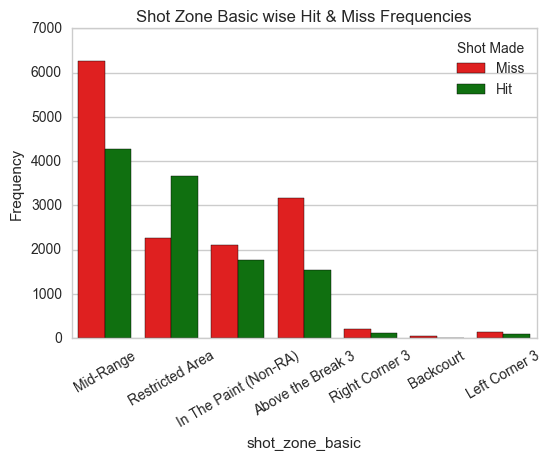

In [12]:
sns.countplot(x="shot_zone_basic", hue="shot_made_flag", data=data,palette=sns.color_palette(['red','green']))
sns.plt.title('Shot Zone Basic wise Hit & Miss Frequencies')
sns.plt.xticks(rotation=30)
sns.plt.ylabel('Frequency')
sns.plt.legend(labels = ['Miss','Hit'],title='Shot Made')

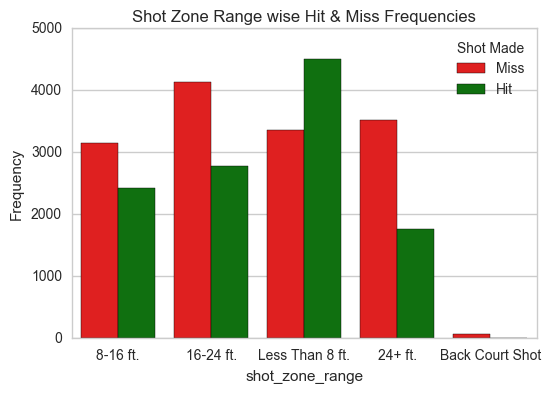

In [13]:
sns.countplot(x="shot_zone_range", hue="shot_made_flag", data=data,palette=sns.color_palette(['red','green']))
sns.plt.title('Shot Zone Range wise Hit & Miss Frequencies')
sns.plt.ylabel('Frequency')
sns.plt.legend(labels = ['Miss','Hit'],title='Shot Made')

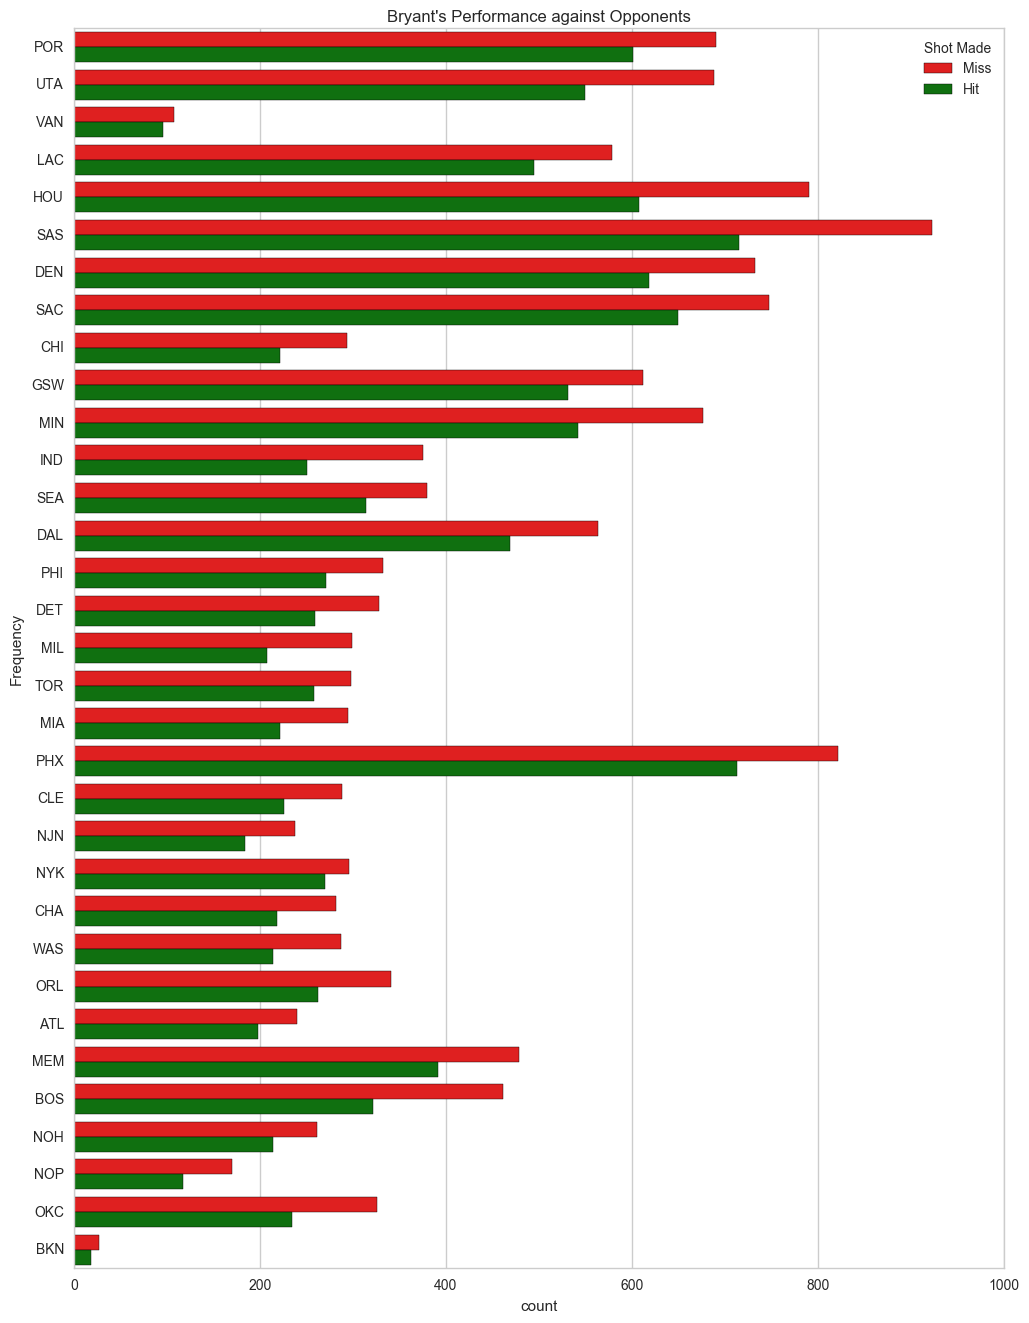

In [14]:
plt.figure(figsize=(12,16))
sns.countplot(y="opponent", hue="shot_made_flag", data=data,palette=sns.color_palette(['red','green']))
sns.plt.title("Bryant's Performance against Opponents")
sns.plt.ylabel('Frequency')
sns.plt.legend(labels = ['Miss','Hit'],title='Shot Made')

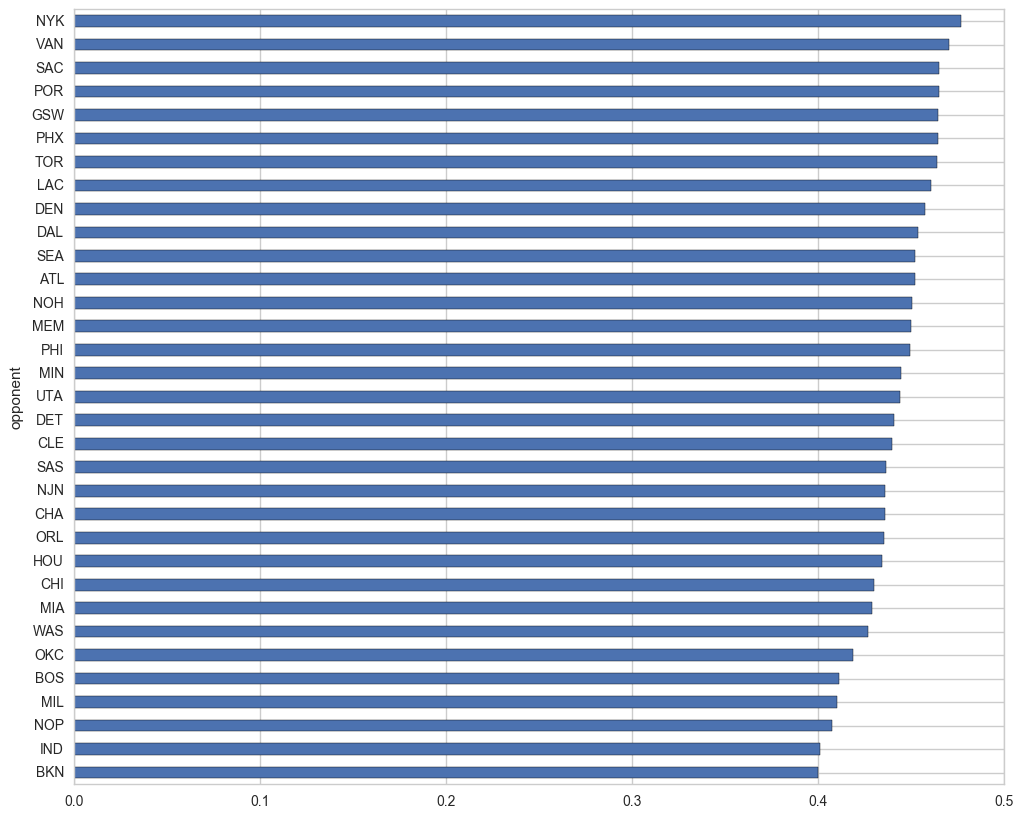

In [15]:
data['shot_made_flag'].groupby(data['opponent']).mean().sort_values().plot(kind='barh', figsize=(12,10))

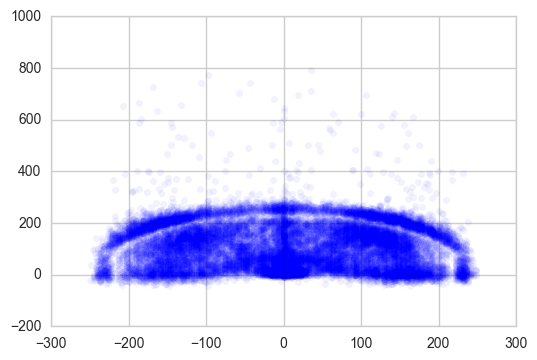

In [16]:
plt.scatter(data.loc_x, data.loc_y, color='blue', alpha=0.05)